## Table of Contents
###  [1.Pre-Processing](pre-processing.ipynb)
###  [2.Data Assimilation](Data Assimilation.ipynb)
###  [3.Post-Processing](post-processing.ipynb)
<div class="toc" style="margin-top: 1em;">
   <ul class="toc-item" id="toc-level0">
      <li><span><a href='#part 3.1' data-toc-modified-id="part 1"><span class="toc-item-num">&nbsp;&nbsp;</span>3.1 Prior vs. Posterior HEF </a></span></li>
      <li><span><a href='#part 3.2' data-toc-modified-id="part 2"><span class="toc-item-num">&nbsp;&nbsp;</span>3.2 Different configurations for observation points</a></span></li>
      <li><span><a href='#part 3.3' data-toc-modified-id="part 3"><span class="toc-item-num">&nbsp;&nbsp;</span>3.3 Frequency of Data collecting</a></span></li>
      <li><span><a href='#part 3.4' data-toc-modified-id="part 2"><span class="toc-item-num">&nbsp;&nbsp;</span>3.4 Number of iterations</a></span></li>
      <li><span><a href='#part 3.5' data-toc-modified-id="part 3"><span class="toc-item-num">&nbsp;&nbsp;</span>3.5 Initial Emsemble of Permeability</a></span></li>
    <li><span><a href='#part 3.6' data-toc-modified-id="part 3"><span class="toc-item-num">&nbsp;&nbsp;</span>3.6 Heterogeneity</a></span></li>     
</div>





<a id='part 3.1'></a>
# 3.1 Prior vs. Posterior HEF 
The hydrologic exchange flux (HEF) is calculated based on Darcy's: HEF = K * VHG, where K is hydraulic conductivity and VHG is vertical hydraulic gradient. VHG is calculated based on the field measurements of hydraulic head at different depth. For prior HEF, K is the initial hydraulic conductivity generated for all realizations that satisfies normal distribution. For posterior HEF, K is the calculated hydraulic conductivity using ES-MDA.

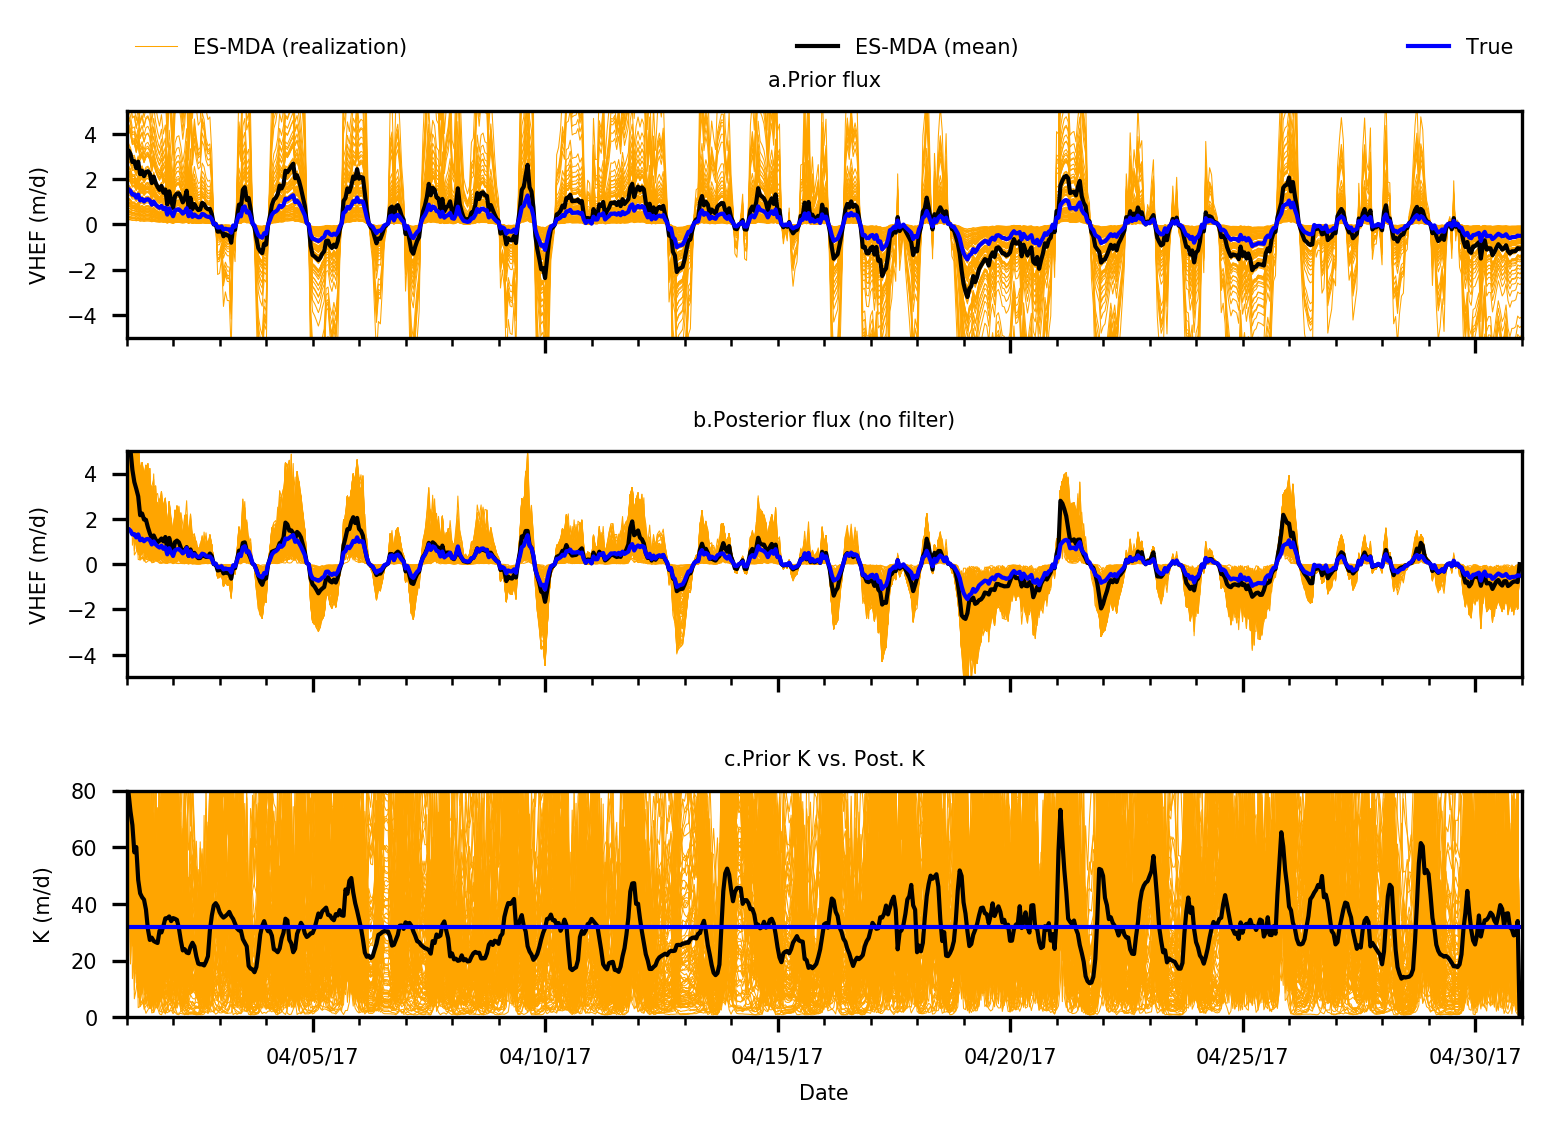

In [224]:
import numpy as np
import h5py 
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import matplotlib.dates as mdates
from datetime import datetime
from datetime import date

def PlotPriorVsPosterior(path_to_priorperm,path_to_nofiltperm,path_to_sdfiltperm,path_to_absfiltperm,path_to_true_flux):
    init_perm = np.loadtxt(path_to_priorperm,dtype=float)
    perm_nofilt = np.loadtxt(path_to_nofiltperm,dtype=float)
    perm_sdfilt = np.loadtxt(path_to_sdfiltperm,dtype=float)
    perm_absfilt = np.loadtxt(path_to_absfiltperm,dtype=float)
    nreaz = init_perm.shape[0] 
    ntime = perm_nofilt.shape[0]
    fsize = 5
                
    init_hy_cond = init_perm*1e6*9.8*3600*24
    true_hy_cond = 32
#    print(init_hy_cond)
#    print(np.std(init_hy_cond))
#    print(np.mean(init_hy_cond))
    hy_cond_nofilt = perm_nofilt*1e6*9.8*3600*24
    hy_cond_sdfilt = perm_nofilt*1e6*9.8*3600*24
    hy_cond_absfilt = perm_nofilt*1e6*9.8*3600*24

    #    print(hy_cond.shape)
    true_flux = pd.read_csv('./dainput/true_flux.csv',sep=',',header=0)
    true_flux['time'] = [datetime.strptime(x,"%m/%d/%Y %H:%M") for x in true_flux['time']]
    dt = true_flux['time']
    dt = [mdates.date2num(x) for x in dt]
    
                
    fig = plt.figure(num=1,dpi=300)
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(311)
    line1, = plt.plot(dt,init_hy_cond[0]*(true_flux['hy_grad'].values),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt,init_hy_cond[i]*(true_flux['hy_grad'].values),'orange',linewidth=0.25)
    line2, = plt.plot(dt,np.mean(init_hy_cond)*(true_flux['hy_grad'].values),'k-',linewidth=1)       
    line3, = plt.plot(dt,-true_flux['avg_flux'].values*24,'b',linewidth=1)
    
    plt.title("a.Prior flux",fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("VHEF (m/d)",fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True'),frameon=False,bbox_to_anchor=(0,1.2,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.,fontsize=fsize)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=10)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
    ax.xaxis.set_ticklabels([])    
#    plt.xticks(np.arange(-5,5,2.5))
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    
    plt.subplot(312)
    line4, = plt.plot(dt[0:ntime],hy_cond_nofilt[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_nofilt[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line5, = plt.plot(dt[0:ntime],np.mean(hy_cond_nofilt[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line6, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("b.Posterior flux (no filter)",fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("VHEF (m/d)",fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())    
    ax.xaxis.set_ticklabels([])   
#    plt.xticks(np.arange(-5,5,2.5))
    plt.tick_params(axis='both', which='major', labelsize=fsize)

    plt.subplot(313)
    line7, = plt.plot(dt[0:ntime],hy_cond_nofilt[0:ntime,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_nofilt[0:ntime,i],'orange',linewidth=0.25)
    line8, = plt.plot(dt[0:ntime],np.mean(hy_cond_nofilt[0:ntime,:],axis=1),'k-',linewidth=1)
    line9, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
    plt.title("c.Prior K vs. Post. K",fontsize=fsize)
    plt.xlabel("Date",fontsize=fsize)
    plt.ylabel("K (m/d)",fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
#    plt.legend((line7,line8),('ES-MDA (realization)','ES-MDA (mean)','True K'),frameon=False,bbox_to_anchor=(0,1.2,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    plt.yticks(np.arange(0,100,20))
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    
    plt.show()

#    print("Add filter to the updated permeability:")
#     fig = plt.figure(num=1,dpi=300)
#     plt.subplot(211)
#     line7, = plt.plot(dt[0:ntime],hy_cond_sdfilt[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
#     for i in range(1,nreaz-1):
#         plt.plot(dt[0:ntime],hy_cond_sdfilt[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
#     line8, = plt.plot(dt[0:ntime],np.mean(hy_cond_sdfilt[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
#     line9, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
#     plt.title("a.Posterior(3 S.D. filter)")
# #    plt.xlabel("Date")
#     plt.ylabel("VHEF (m/d)")
#     plt.xlim([date(2017,4,1),date(2017,5,1)])
#     plt.ylim([-5,5])
#     plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,1.2,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
#     ax = plt.gca()
#     daysFmt = mdates.DateFormatter("%m/%d/%y")
#     days = mdates.DayLocator(interval=5)    
#     ax.xaxis.set_major_locator(days)
#     ax.xaxis.set_major_formatter(daysFmt)
#     ax.xaxis.set_minor_locator(mdates.DayLocator())    
#     ax.xaxis.set_ticklabels([])    
    
#     plt.subplot(212)
#     line10, = plt.plot(dt[0:ntime],hy_cond_absfilt[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
#     for i in range(1,nreaz-1):
#         plt.plot(dt[0:ntime],hy_cond_absfilt[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
#     line11, = plt.plot(dt[0:ntime],np.mean(hy_cond_absfilt[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
#     line12, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
#     plt.title("b.Posterior(3 Abs. filter)")
#     plt.xlabel("Date")
#     plt.ylabel("VHEF (m/d)")
#     plt.xlim([date(2017,4,1),date(2017,5,1)])
#     plt.ylim([-5,5])
# #    plt.legend((line10,line11,line12),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,-1.2,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0.)
    
#     ax = plt.gca()
#     daysFmt = mdates.DateFormatter("%m/%d/%y")
#     days = mdates.DayLocator(interval=5)    
#     ax.xaxis.set_major_locator(days)
#     ax.xaxis.set_major_formatter(daysFmt)
#     ax.xaxis.set_minor_locator(mdates.DayLocator())    
#     plt.savefig('./figure/VerticalFluxPrior.png')
#    plt.show()
    
#    plt.subplot(313)
#    data = [init_hy_cond,hy_cond[-1,:]]
#    data = [init_hy_cond,hy_cond[460,:]]
#    plt.boxplot(data)
#    plt.ylabel("VHEF (m/d)")
#    plt.ylim([0,200])
#    ax = plt.gca()
#    ax.set_xticklabels(['Prior','Posterior'])
                        
PlotPriorVsPosterior('./figure/init_perm.txt','./figure/perm_BC14_Obs23_nofilt.txt','./figure/perm_BC14_Obs23_sdfilt.txt','./figure/perm_BC14_Obs23_absfilt.txt','./dainput/true_flux.csv')

<a id='part 3.2'></a>
# 3.2 Different configurations for observation points

There are four temperature sensors (named 1,2,3,4 from top to bottom) that are used to record the temperature variations above and below riverbed. Sensor 1 is 0.16 m above the riverbed, and sensors 2,3 and 4 are 0.04 m, 0.24 m and 0.64 m below the riverbed, respectively. Three sceneries are considerd:
a. 2 observation points at the locations of sensor 2 and 3
b. 1 obsercation point at the location of sensor 2
c. 1 observation point at the location of sensor 3

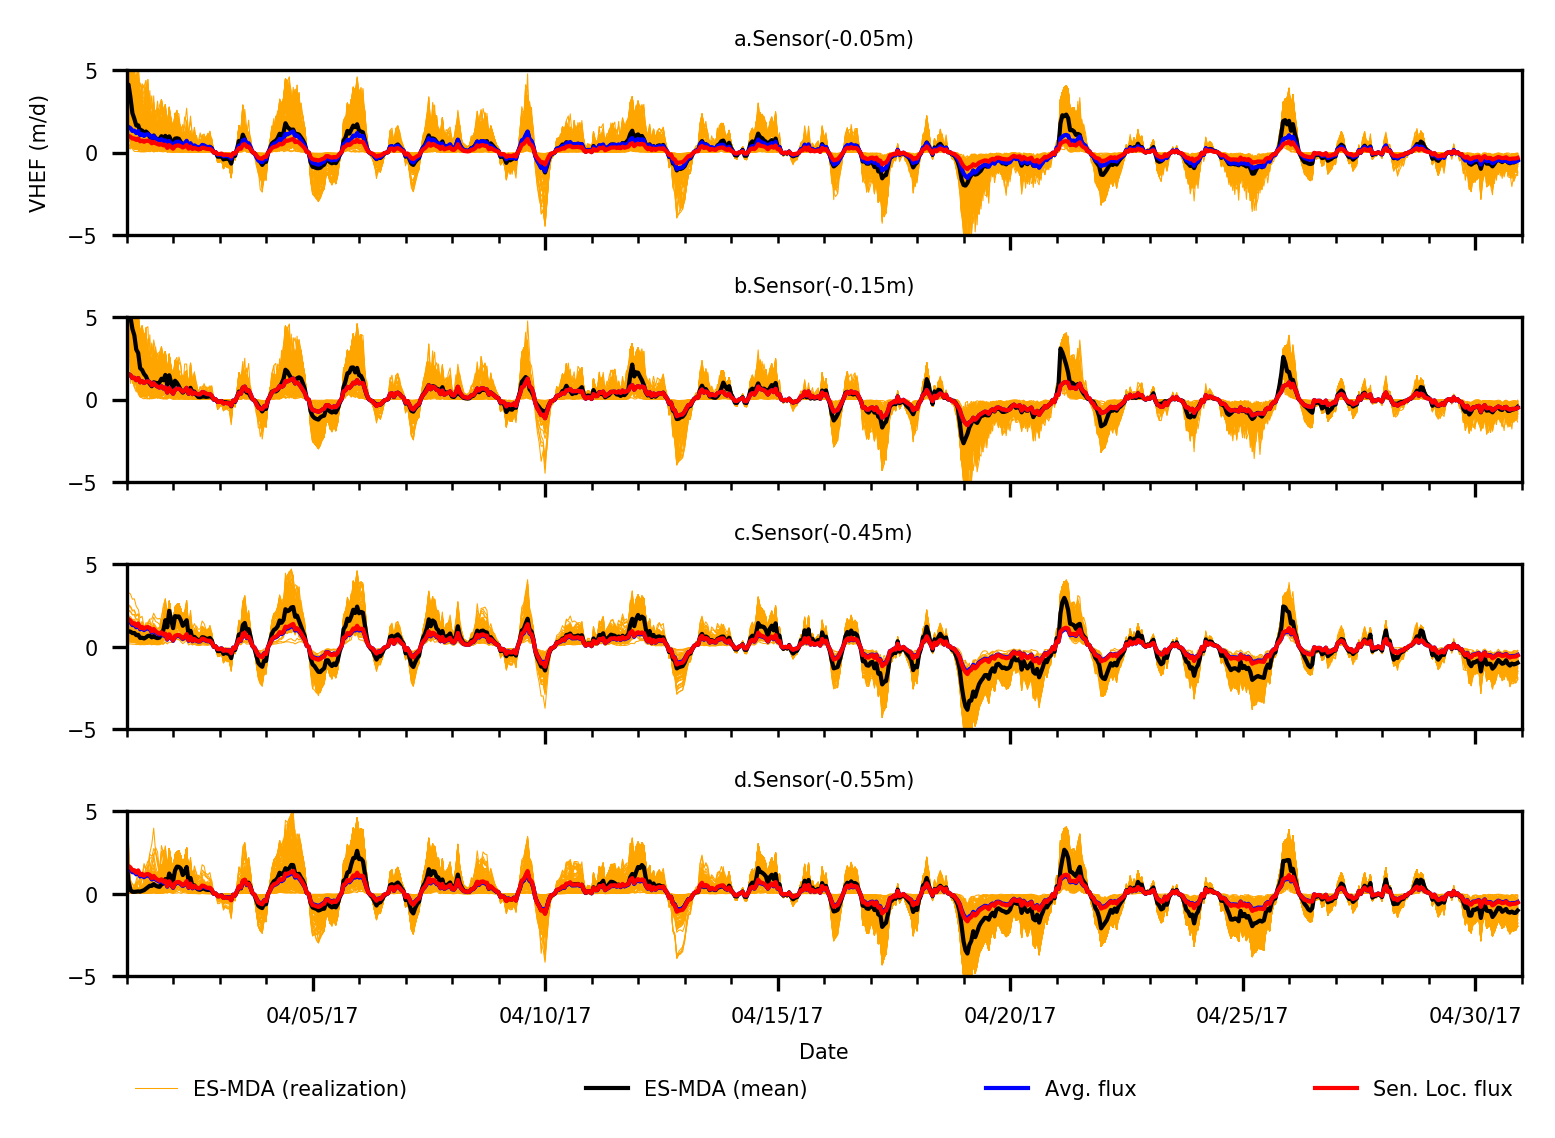

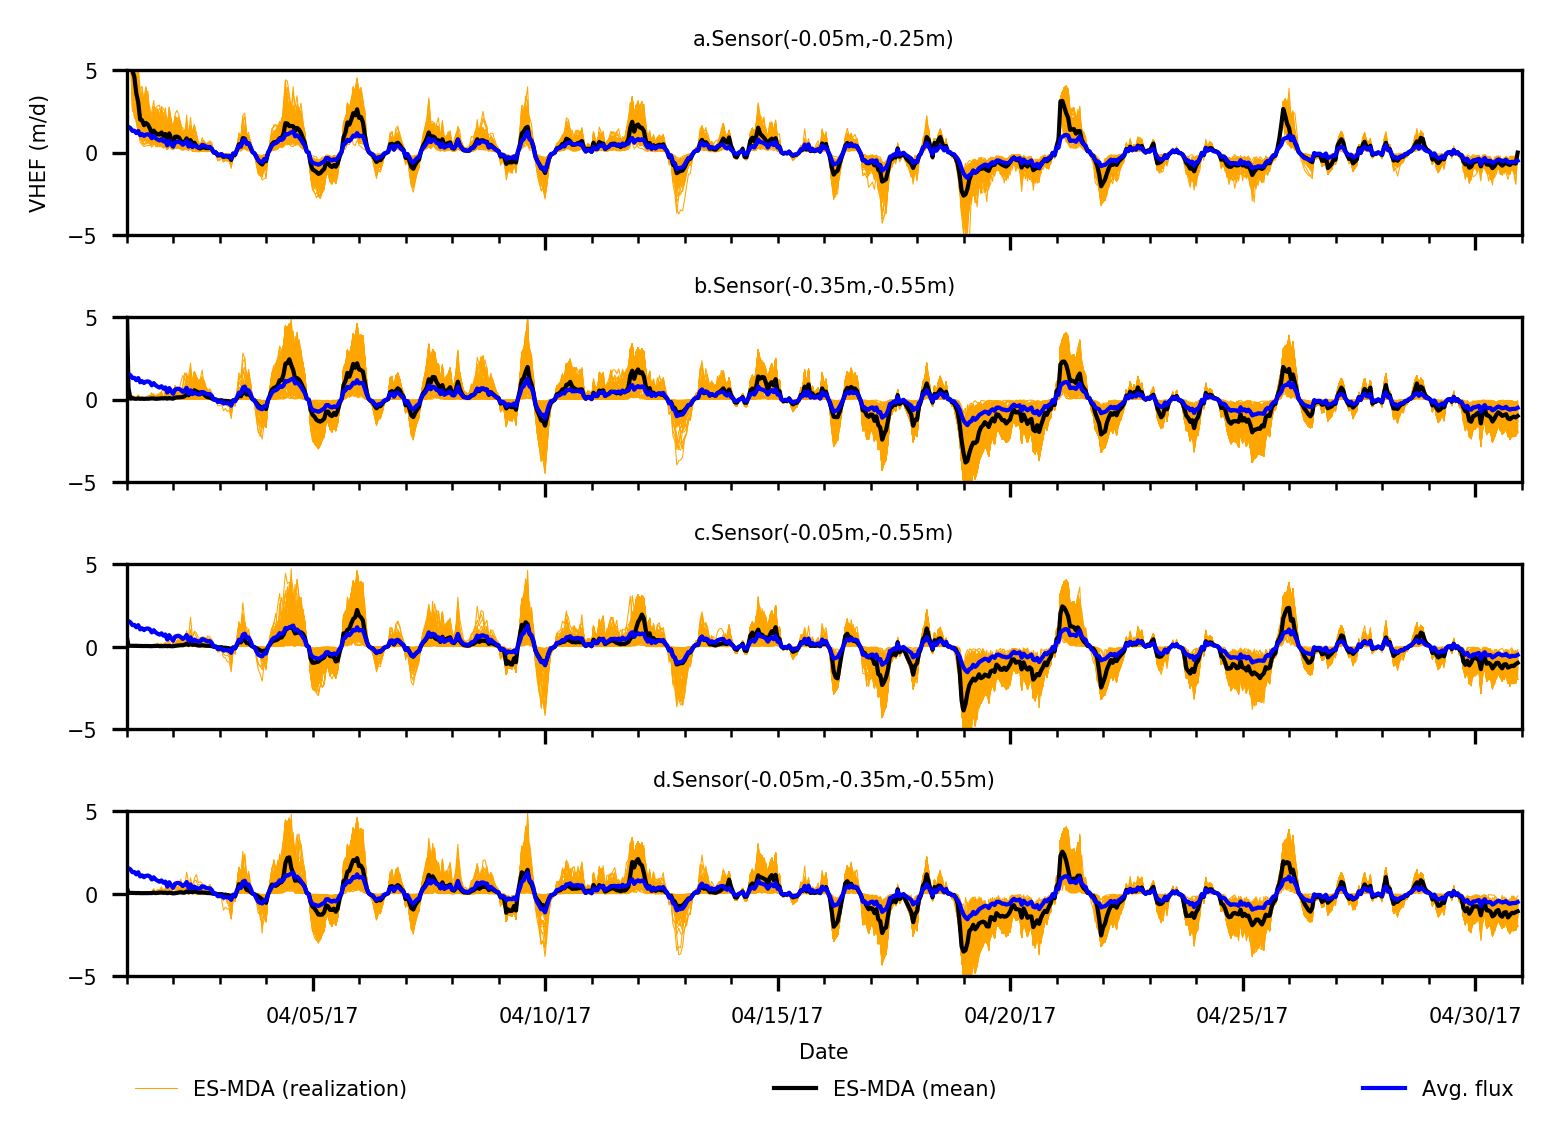

In [133]:
perm05 = np.loadtxt('./figure/perm_BC14_Obs23_05.txt',dtype=float)
perm15 = np.loadtxt('./figure/perm_BC14_Obs23_15.txt',dtype=float)
perm25 = np.loadtxt('./figure/perm_BC14_Obs23_25.txt',dtype=float)
perm35 = np.loadtxt('./figure/perm_BC14_Obs23_35.txt',dtype=float)
perm45 = np.loadtxt('./figure/perm_BC14_Obs23_45.txt',dtype=float)
perm55 = np.loadtxt('./figure/perm_BC14_Obs23_55.txt',dtype=float)
perm05_25 = np.loadtxt('./figure/perm_BC14_Obs23_05_25.txt',dtype=float)
perm35_55 = np.loadtxt('./figure/perm_BC14_Obs23_35_55.txt',dtype=float)
perm05_55 = np.loadtxt('./figure/perm_BC14_Obs23_05_55.txt',dtype=float)
perm05_35_55 = np.loadtxt('./figure/perm_BC14_Obs23_05_35_55.txt',dtype=float)
hy_cond05 = perm05*1e6*9.8*3600*24
hy_cond15 = perm15*1e6*9.8*3600*24
hy_cond25 = perm25*1e6*9.8*3600*24
hy_cond35 = perm35*1e6*9.8*3600*24
hy_cond45 = perm45*1e6*9.8*3600*24
hy_cond55 = perm55*1e6*9.8*3600*24
hy_cond05_25 = perm05_25*1e6*9.8*3600*24
hy_cond35_55 = perm35_55*1e6*9.8*3600*24
hy_cond05_55 = perm05_55*1e6*9.8*3600*24
hy_cond05_35_55 = perm05_35_55*1e6*9.8*3600*24
fsize = 5

data = pd.read_csv('./dainput/true_flux.csv',sep=',',header=0)
data['time'] = [datetime.strptime(x,"%m/%d/%Y %H:%M") for x in data['time']]
dt = data['time']
dt = [mdates.date2num(x) for x in dt]
ntime = perm05.shape[0]-1
nreaz = perm05.shape[1]            

fig = plt.figure(num=1,dpi=300)
fig.subplots_adjust(hspace=.5)
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.subplot(411)
line1, = plt.plot(dt[0:ntime],hy_cond05[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond05[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond05[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.05m)'].values[0:ntime]*24,'r',linewidth=1) 
plt.title("a.Sensor(-0.05m)",fontsize=fsize)
#    plt.xlabel("Date")
plt.ylabel("VHEF (m/d)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
ax.xaxis.set_ticklabels([])     
plt.tick_params(axis='both', which='major', labelsize=fsize)


plt.subplot(412)
line1, = plt.plot(dt[0:ntime],hy_cond15[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond15[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond15[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.15m)'].values[0:ntime]*24,'r',linewidth=1) 
plt.title("b.Sensor(-0.15m)",fontsize=fsize)
#    plt.xlabel("Date")
#plt.ylabel("VHEF (m/d)")
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
ax.xaxis.set_ticklabels([])     
plt.tick_params(axis='both', which='major', labelsize=fsize)

plt.subplot(413)
line1, = plt.plot(dt[0:ntime],hy_cond45[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond45[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond45[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.45m)'].values[0:ntime]*24,'r',linewidth=1) 
plt.title("c.Sensor(-0.45m)",fontsize=fsize)
#    plt.xlabel("Date")
#plt.ylabel("VHEF (m/d)")
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
ax.xaxis.set_ticklabels([])     
plt.tick_params(axis='both', which='major', labelsize=fsize)


plt.subplot(414)
line1, = plt.plot(dt[0:ntime],hy_cond55[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond55[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond55[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.55m)'].values[0:ntime]*24,'r',linewidth=1) 
plt.title("d.Sensor(-0.55m)",fontsize=fsize)
plt.xlabel("Date",fontsize=fsize)
#plt.ylabel("VHEF (m/d)")
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([-5,5])
plt.legend((line1,line2,line3,line4),('ES-MDA (realization)','ES-MDA (mean)','Avg. flux','Sen. Loc. flux'),frameon=False,bbox_to_anchor=(0,-0.8,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.,fontsize=fsize)
    
ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=5)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
plt.tick_params(axis='both', which='major', labelsize=fsize)

plt.show()

fig = plt.figure(num=1,dpi=300)
fig.subplots_adjust(hspace=.5)
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.subplot(411)
line1, = plt.plot(dt[0:ntime],hy_cond05_25[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond05_25[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond05_25[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
#line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.05m)'].values[0:ntime]*24,'r',linewidth=1) 
plt.title("a.Sensor(-0.05m,-0.25m)",fontsize=fsize)
#    plt.xlabel("Date")
plt.ylabel("VHEF (m/d)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
ax.xaxis.set_ticklabels([])     
plt.tick_params(axis='both', which='major', labelsize=fsize)


plt.subplot(412)
line1, = plt.plot(dt[0:ntime],hy_cond35_55[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond35_55[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond35_55[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
#line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.15m)'].values[0:ntime]*24,'r',linewidth=1) 
plt.title("b.Sensor(-0.35m,-0.55m)",fontsize=fsize)
#    plt.xlabel("Date")
#plt.ylabel("VHEF (m/d)")
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
ax.xaxis.set_ticklabels([])     
plt.tick_params(axis='both', which='major', labelsize=fsize)

plt.subplot(413)
line1, = plt.plot(dt[0:ntime],hy_cond05_55[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond05_55[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond05_55[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
#line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.25m)'].values[0:ntime]*24,'r',linewidth=1) 
plt.title("c.Sensor(-0.05m,-0.55m)",fontsize=fsize)
#    plt.xlabel("Date")
#plt.ylabel("VHEF (m/d)")
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
ax.xaxis.set_ticklabels([])     
plt.tick_params(axis='both', which='major', labelsize=fsize)


plt.subplot(414)
line1, = plt.plot(dt[0:ntime],hy_cond05_35_55[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond05_35_55[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond05_35_55[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
#line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.55m)'].values[0:ntime]*24,'r',linewidth=1) 
plt.title("d.Sensor(-0.05m,-0.35m,-0.55m)",fontsize=fsize)
plt.xlabel("Date",fontsize=fsize)
#plt.ylabel("VHEF (m/d)")
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([-5,5])
plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','Avg. flux'),frameon=False,bbox_to_anchor=(0,-0.8,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.,fontsize=fsize)
    
ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=5)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
plt.tick_params(axis='both', which='major', labelsize=fsize)

plt.show()
     
#plt.subplot(311)
#Plot1Sensor('./figure/perm_BC14_Obs2.txt','Sensor(-0.05m)','./dainput/true_flux.csv')

<a id='part 3.3'></a>
# 3.3 Frequency of Data collecting 
Frequencies of data collecting at the inverval of 1 h, 2h, 4h and 8 h are compared.


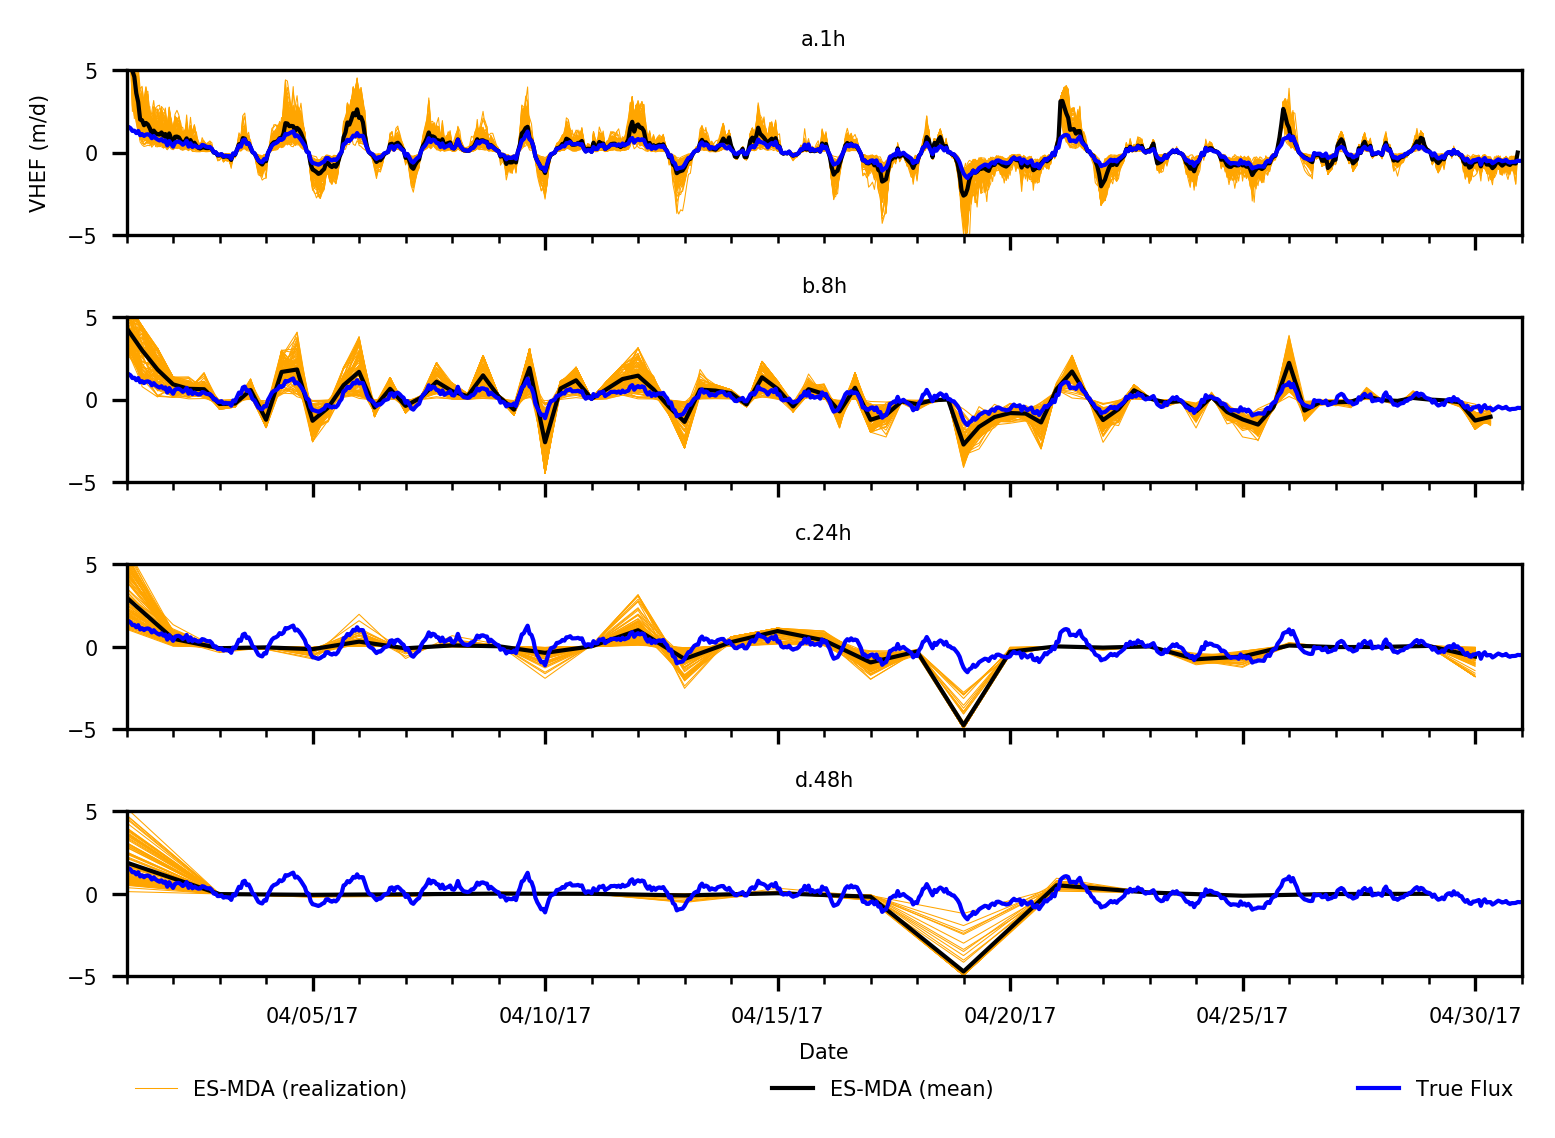

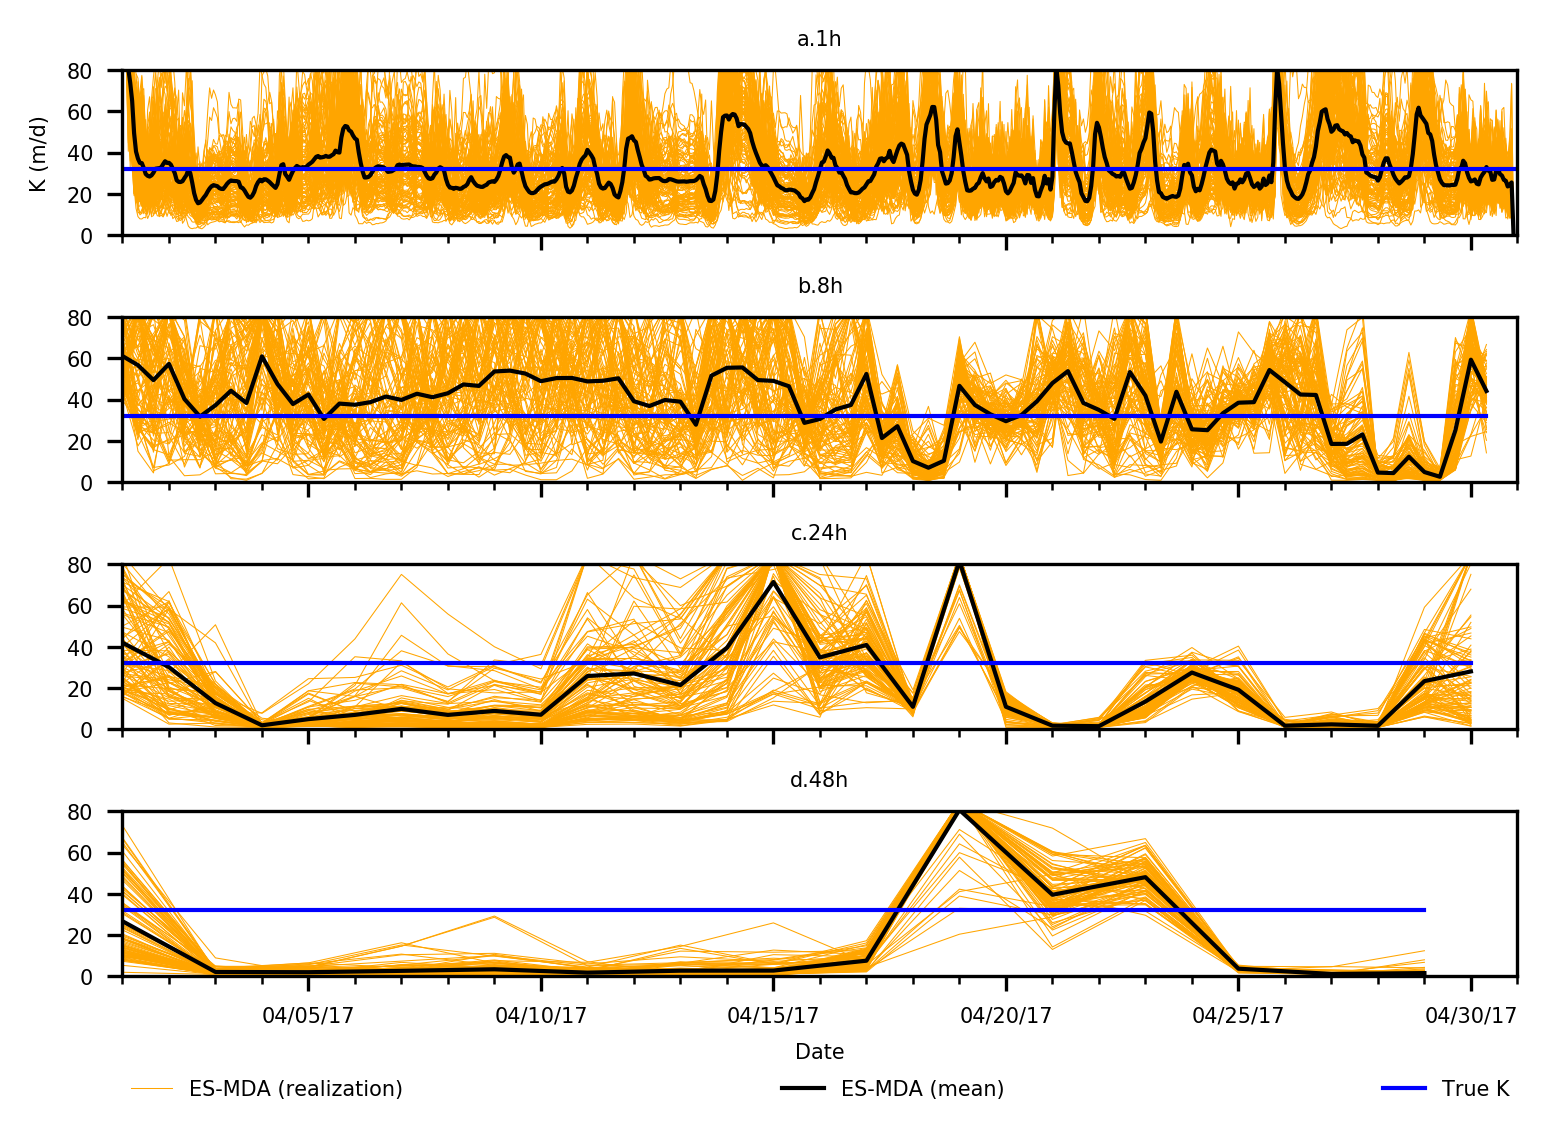

In [195]:
def PlotFreqDataCol(path_to_perm_BC14_Obs23_1h,path_to_perm_BC14_Obs23_8h,path_to_perm_BC14_Obs23_24h,path_to_perm_BC14_Obs23_48h,path_to_true_flux_1h,path_to_true_flux_8h,path_to_true_flux_24h,path_to_true_flux_48h):
    perm_BC14_Obs23_1h = np.loadtxt(path_to_perm_BC14_Obs23_1h,dtype=float)
    perm_BC14_Obs23_8h = np.loadtxt(path_to_perm_BC14_Obs23_8h,dtype=float)
    perm_BC14_Obs23_24h = np.loadtxt(path_to_perm_BC14_Obs23_24h,dtype=float)
    perm_BC14_Obs23_48h = np.loadtxt(path_to_perm_BC14_Obs23_48h,dtype=float)
    
    hy_cond_BC14_Obs23_1h = perm_BC14_Obs23_1h*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_8h = perm_BC14_Obs23_8h*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_24h = perm_BC14_Obs23_24h*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_48h = perm_BC14_Obs23_48h*1e6*9.8*3600*24
    true_hy_cond =32
    
    true_flux_1h = pd.read_csv(path_to_true_flux_1h,sep=',',header=0)
    true_flux_1h['time'] = [datetime.strptime(x,"%m/%d/%y %H:%M") for x in true_flux_1h['time']]
    dt_1h = true_flux_1h['time']
    dt_1h = [mdates.date2num(x) for x in dt_1h]
    true_flux_8h = pd.read_csv(path_to_true_flux_8h,sep=',',header=0)
    true_flux_8h['time'] = [datetime.strptime(x,"%m/%d/%y %H:%M") for x in true_flux_8h['time']]
    dt_8h = true_flux_8h['time']
    dt_8h = [mdates.date2num(x) for x in dt_8h]
    true_flux_24h = pd.read_csv(path_to_true_flux_24h,sep=',',header=0)
    true_flux_24h['time'] = [datetime.strptime(x,"%m/%d/%y %H:%M") for x in true_flux_24h['time']]
    dt_24h = true_flux_24h['time']
    dt_24h = [mdates.date2num(x) for x in dt_24h]
    true_flux_48h = pd.read_csv(path_to_true_flux_48h,sep=',',header=0)
    true_flux_48h['time'] = [datetime.strptime(x,"%m/%d/%y %H:%M") for x in true_flux_48h['time']]
    dt_48h = true_flux_48h['time']
    dt_48h = [mdates.date2num(x) for x in dt_48h]
    
    ntime_1h = perm_BC14_Obs23_1h.shape[0]-1
    ntime_8h = perm_BC14_Obs23_8h.shape[0]-1   
    ntime_24h = perm_BC14_Obs23_24h.shape[0]-1
    ntime_48h = perm_BC14_Obs23_48h.shape[0]-1    
    ntime = len(dt_1h)
    nreaz = perm_BC14_Obs23_1h.shape[1] 
    fsize = 5
                
    fig = plt.figure(dpi=300)
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(411)
    line1, = plt.plot(dt_1h[0:ntime_1h],hy_cond_BC14_Obs23_1h[0:ntime_1h,0]*(true_flux_1h['hy_grad'].values[0:ntime_1h]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_1h[0:ntime_1h],hy_cond_BC14_Obs23_1h[0:ntime_1h,i]*(true_flux_1h['hy_grad'].values[0:ntime_1h]),'orange',linewidth=0.25)
    line2, = plt.plot(dt_1h[0:ntime_1h],np.mean(hy_cond_BC14_Obs23_1h[0:ntime_1h,:],axis=1)*(true_flux_1h['hy_grad'].values[0:ntime_1h]),'k-',linewidth=1)       
    line3, = plt.plot(dt_1h[0:ntime],-true_flux_1h['true_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("a.1h",fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("VHEF (m/d)",fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=10)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)


    plt.subplot(412)
    line10, = plt.plot(dt_8h[0:ntime_8h],hy_cond_BC14_Obs23_8h[0:ntime_8h,0]*(true_flux_8h['hy_grad'].values[0:ntime_8h]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_8h[0:ntime_8h],hy_cond_BC14_Obs23_8h[0:ntime_8h,i]*(true_flux_8h['hy_grad'].values[0:ntime_8h]),'orange',linewidth=0.25)
    line11, = plt.plot(dt_8h[0:ntime_8h],np.mean(hy_cond_BC14_Obs23_8h[0:ntime_8h,:],axis=1)*(true_flux_8h['hy_grad'].values[0:ntime_8h]),'k-',linewidth=1)       
    line12, = plt.plot(dt_1h[0:ntime],-true_flux_1h['true_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("b.8h",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,0,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)

    plt.subplot(413)
    line13, = plt.plot(dt_24h[0:30],hy_cond_BC14_Obs23_24h[0:30,0]*(true_flux_24h['hy_grad'].values[0:30]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_24h[0:30],hy_cond_BC14_Obs23_24h[0:30,i]*(true_flux_24h['hy_grad'].values[0:30]),'orange',linewidth=0.25)
    line14, = plt.plot(dt_24h[0:30],np.mean(hy_cond_BC14_Obs23_24h[0:30,:],axis=1)*(true_flux_24h['hy_grad'].values[0:30]),'k-',linewidth=1)       
    line15, = plt.plot(dt_1h[0:ntime],-true_flux_1h['true_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("c.24h",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])

    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())    
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)


    plt.subplot(414)
    line16, = plt.plot(dt_48h[0:15],hy_cond_BC14_Obs23_48h[0:15,0]*(true_flux_48h['hy_grad'].values[0:15]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_48h[0:15],hy_cond_BC14_Obs23_48h[0:15,i]*(true_flux_48h['hy_grad'].values[0:15]),'orange',linewidth=0.25)
    line17, = plt.plot(dt_48h[0:15],np.mean(hy_cond_BC14_Obs23_48h[0:15,:],axis=1)*(true_flux_48h['hy_grad'].values[0:15]),'k-',linewidth=1)       
    line18, = plt.plot(dt_1h[0:ntime],-true_flux_1h['true_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("d.48h",fontsize=fsize)
    plt.xlabel("Date",fontsize=fsize)
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True Flux'),frameon=False,bbox_to_anchor=(0,-0.8,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=fsize)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    plt.tick_params(axis='both', which='major', labelsize=fsize)

#    plt.savefig('./figure/sensorconfig.png')
    plt.show()    

    ############################################################################################################################    

#                                                 Plot K

    ########################################################################################################################
    fig = plt.figure(dpi=300)
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(411)
    line1, = plt.plot(dt_1h[0:ntime_1h],hy_cond_BC14_Obs23_1h[0:ntime_1h,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_1h[0:ntime_1h],hy_cond_BC14_Obs23_1h[0:ntime_1h,i],'orange',linewidth=0.25)
    line2, = plt.plot(dt_1h[0:ntime_1h],np.mean(hy_cond_BC14_Obs23_1h[0:ntime_1h,:],axis=1),'k-',linewidth=1)       
    line3, = plt.plot(dt_1h[0:ntime_1h],np.ones((ntime_1h,))*true_hy_cond,'b',linewidth=1)
    
    plt.title("a.1h",fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("K (m/d)",fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=10)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))
    
    plt.subplot(412)
    line10, = plt.plot(dt_8h[0:ntime_8h],hy_cond_BC14_Obs23_8h[0:ntime_8h,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_8h[0:ntime_8h],hy_cond_BC14_Obs23_8h[0:ntime_8h,i],'orange',linewidth=0.25)
    line11, = plt.plot(dt_8h[0:ntime_8h],np.mean(hy_cond_BC14_Obs23_8h[0:ntime_8h,:],axis=1),'k-',linewidth=1)       
    line12, = plt.plot(dt_8h[0:ntime_8h],np.ones((ntime_8h,))*true_hy_cond,'b',linewidth=1)
    
    plt.title("b.8h",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,0,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))

    plt.subplot(413)
    line13, = plt.plot(dt_24h[0:30],hy_cond_BC14_Obs23_24h[0:30,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_24h[0:30],hy_cond_BC14_Obs23_24h[0:30,i],'orange',linewidth=0.25)
    line14, = plt.plot(dt_24h[0:30],np.mean(hy_cond_BC14_Obs23_24h[0:30,:],axis=1),'k-',linewidth=1)       
    line15, = plt.plot(dt_24h[0:30],np.ones((30,))*true_hy_cond,'b',linewidth=1)

    plt.title("c.24h",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])

    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())    
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))


    plt.subplot(414)
    line16, = plt.plot(dt_48h[0:15],hy_cond_BC14_Obs23_48h[0:15,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_48h[0:15],hy_cond_BC14_Obs23_48h[0:15,i],'orange',linewidth=0.25)
    line17, = plt.plot(dt_48h[0:15],np.mean(hy_cond_BC14_Obs23_48h[0:15,:],axis=1),'k-',linewidth=1)       
    line18, = plt.plot(dt_48h[0:15],np.ones((15,))*true_hy_cond,'b',linewidth=1)
    plt.title("d.48h",fontsize=fsize)
    plt.xlabel("Date",fontsize=fsize)
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True K'),frameon=False,bbox_to_anchor=(0,-0.8,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=fsize)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))

#    plt.savefig('./figure/sensorconfig.png')
    plt.show() 
PlotFreqDataCol('./figure/perm_BC14_Obs23_1h.txt','./figure/perm_BC14_Obs23_8h.txt','./figure/perm_BC14_Obs23_24h.txt','./figure/perm_BC14_Obs23_48h.txt','./dainput/true_flux_1h.csv','./dainput/true_flux_8h.csv','./dainput/true_flux_24h.csv','./dainput/true_flux_48h.csv')



<a id='part 3.4'></a>
# 3.4 Number of iterations
Different number of iterations at each time step are tested

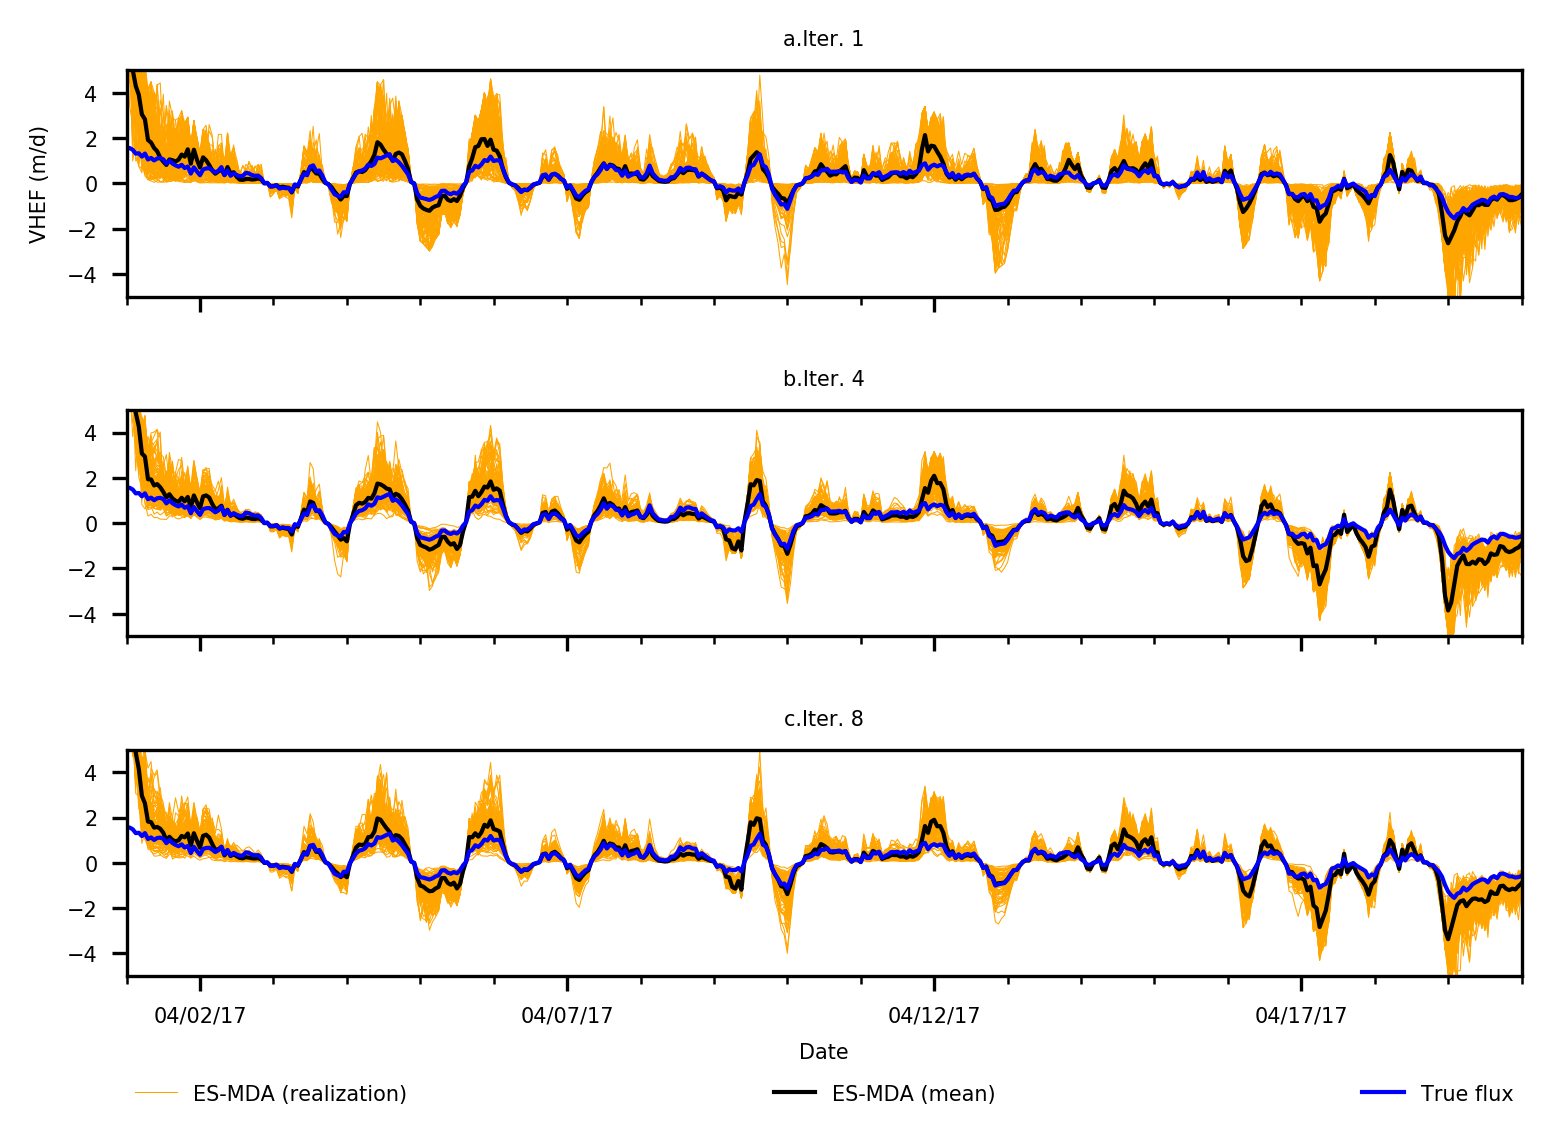

In [216]:
def PlotNumIter(path_to_perm_BC14_Obs23_iter1,path_to_perm_BC14_Obs23_iter2,path_to_perm_BC14_Obs23_iter4,path_to_true_flux):
    perm_BC14_Obs23_iter1 = np.loadtxt(path_to_perm_BC14_Obs23_iter1,dtype=float)
    perm_BC14_Obs23_iter2 = np.loadtxt(path_to_perm_BC14_Obs23_iter2,dtype=float)
    perm_BC14_Obs23_iter4 = np.loadtxt(path_to_perm_BC14_Obs23_iter4,dtype=float)
    hy_cond_BC14_Obs23_iter1 = perm_BC14_Obs23_iter1*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_iter2 = perm_BC14_Obs23_iter2*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_iter4 = perm_BC14_Obs23_iter4*1e6*9.8*3600*24

    true_flux = pd.read_csv('./dainput/true_flux.csv',sep=',',header=0)
    true_flux['time'] = [datetime.strptime(x,"%m/%d/%Y %H:%M") for x in true_flux['time']]
    dt = true_flux['time']
    dt = [mdates.date2num(x) for x in dt]
    ntime = perm_BC14_Obs23_iter1.shape[0]-1
    nreaz = perm_BC14_Obs23_iter1.shape[1] 
    ntime = 500
    fsize = 5
    
#    for i in range(nreaz):
#        for j in range(ntime-1):
#            print(j)
#            if (hy_cond_BC14_Obs23_iter1[j+1,i]/hy_cond_BC14_Obs23_iter1[j,i])>3:
#                hy_cond_BC14_Obs23_iter1[j+1,i] = hy_cond_BC14_Obs23_iter1[j,i]
#            if (hy_cond_BC14_Obs23_iter2[j+1,i]/hy_cond_BC14_Obs23_iter2[j,i])>3:
#                hy_cond_BC14_Obs23_iter2[j+1,i] = hy_cond_BC14_Obs23_iter2[j,i]            
#                print(i)
#            if (hy_cond_BC14_Obs23_iter4[j+1,i]/hy_cond_BC14_Obs23_iter4[j,i])>3:
#                hy_cond_BC14_Obs23_iter4[j+1,i] = hy_cond_BC14_Obs23_iter4[j,i]
                
    fig = plt.figure(dpi=300)
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(311)
    line1, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter1[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter1[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line2, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_iter1[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line3, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("a.Iter. 1", fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("VHEF (m/d)", fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,4,20)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=10)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    
    plt.subplot(312)
    line4, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter2[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter2[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line5, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_iter2[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line6, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("b.Iter. 4", fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,4,20)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,0,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())    
    ax.xaxis.set_ticklabels([])      
    plt.tick_params(axis='both', which='major', labelsize=fsize)

    plt.subplot(313)
    line7, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter4[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter4[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line8, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_iter4[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line9, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("c.Iter. 8", fontsize=fsize)
    plt.xlabel("Date", fontsize=fsize)
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,4,20)])
    plt.ylim([-5,5])
    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,-0.6,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=fsize)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())  
    plt.tick_params(axis='both', which='major', labelsize=fsize)

    plt.savefig('./figure/sensorconfig.png')
    plt.show()
                        
PlotNumIter('./figure/perm_BC14_Obs23_iter1.txt','./figure/perm_BC14_Obs23_iter4.txt','./figure/perm_BC14_Obs23_iter8.txt','./dainput/true_flux.csv')

<a id='part 3.5'></a>
# 3.5 Initial Emsemble of Permeability


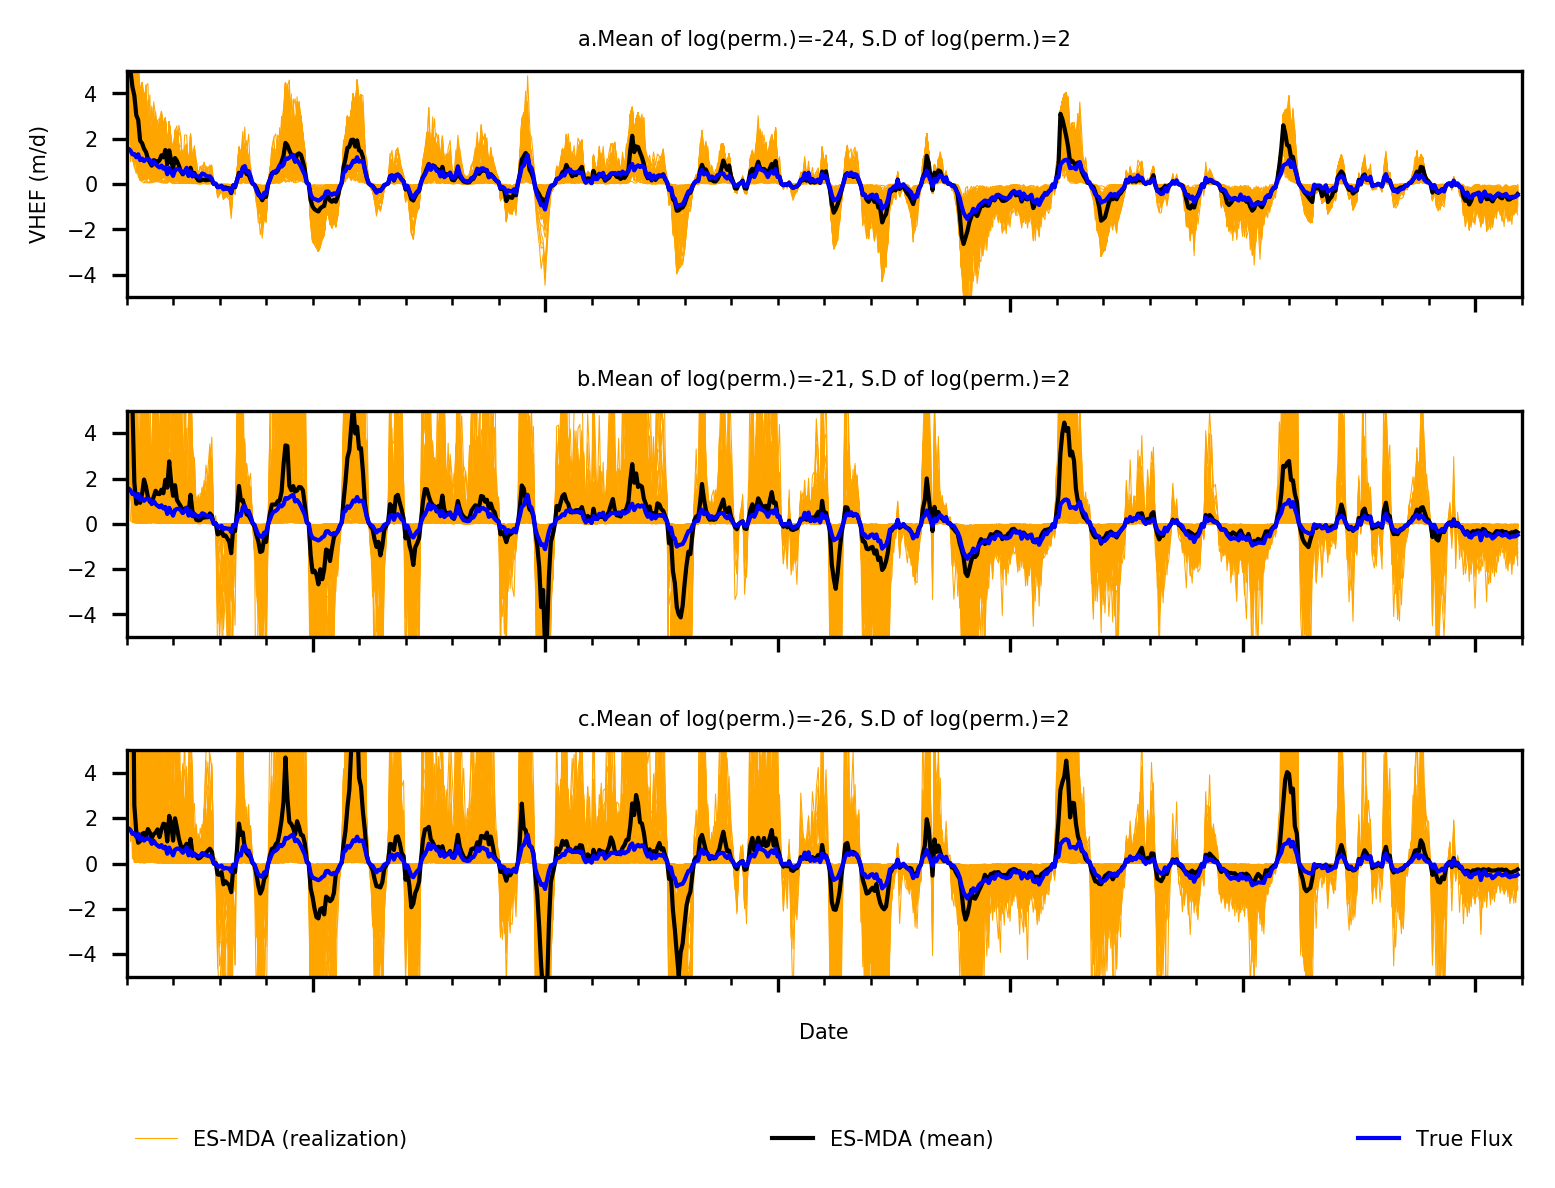

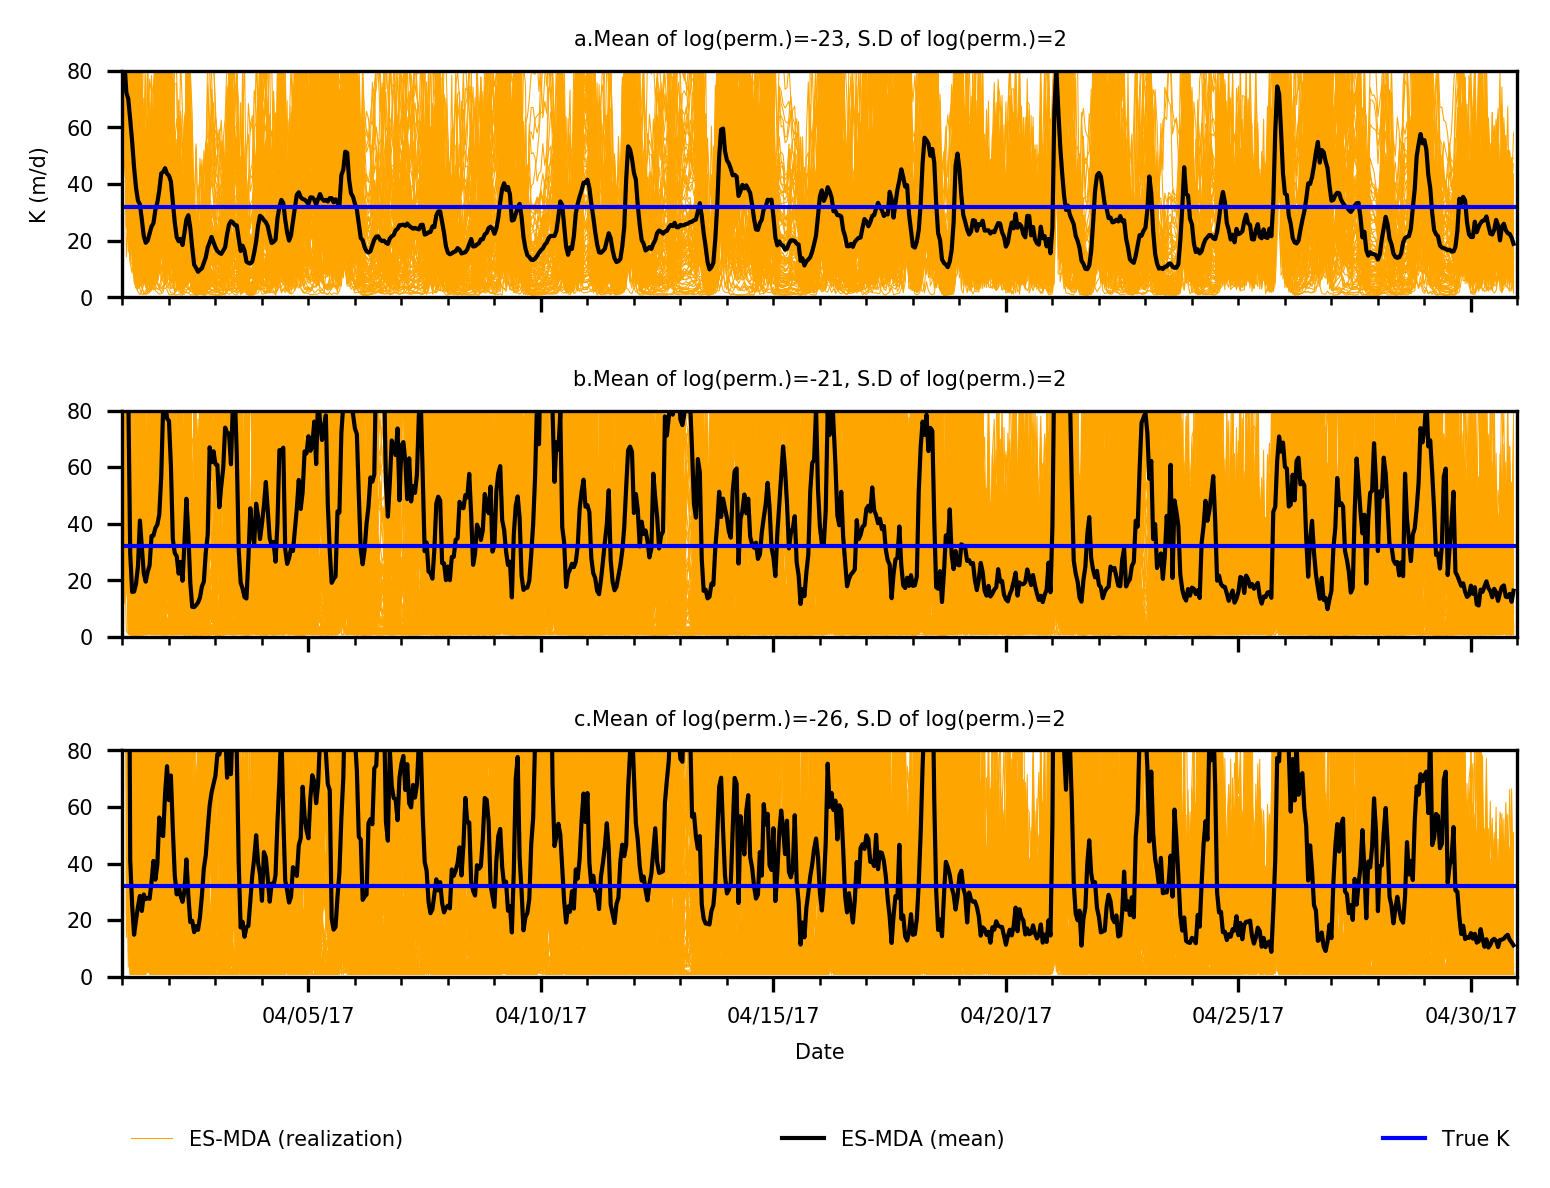

In [228]:
def PlotInitEmsPerm(path_to_perm_BC14_Obs23_mean21,path_to_perm_BC14_Obs23_mean23,path_to_perm_BC14_Obs23_mean26,path_to_true_flux):
    perm_BC14_Obs23_21 = np.loadtxt(path_to_perm_BC14_Obs23_mean21,dtype=float)
    perm_BC14_Obs23_23 = np.loadtxt(path_to_perm_BC14_Obs23_mean23,dtype=float)
    perm_BC14_Obs23_26 = np.loadtxt(path_to_perm_BC14_Obs23_mean26,dtype=float)
    
    hy_cond_BC14_Obs23_21 = perm_BC14_Obs23_21*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_23 = perm_BC14_Obs23_23*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_26 = perm_BC14_Obs23_26*1e6*9.8*3600*24
    true_hy_cond =32

    ntime = perm_BC14_Obs23_23.shape[0]-1   
    nreaz = perm_BC14_Obs23_23.shape[1] 
    fsize = 5
    
#    for i in range(nreaz):
#        for j in range(ntime-1):
#            if (hy_cond_BC14_Obs23_21[j+1,i]/hy_cond_BC14_Obs23_21[j,i])>10:
#                hy_cond_BC14_Obs23_21[j+1,i] = hy_cond_BC14_Obs23_21[j,i]
#            if (hy_cond_BC14_Obs23_23[j+1,i]/hy_cond_BC14_Obs23_23[j,i])>10:
#                hy_cond_BC14_Obs23_23[j+1,i] = hy_cond_BC14_Obs23_23[j,i]            
#            if (hy_cond_BC14_Obs23_26[j+1,i]/hy_cond_BC14_Obs23_26[j,i])>10:
#                hy_cond_BC14_Obs23_26[j+1,i] = hy_cond_BC14_Obs23_26[j,i]    
    
    true_flux = pd.read_csv(path_to_true_flux,sep=',',header=0)
    true_flux['time'] = [datetime.strptime(x,"%m/%d/%Y %H:%M") for x in true_flux['time']]
    dt = true_flux['time']
    dt = [mdates.date2num(x) for x in dt]

                
    fig = plt.figure(dpi=300)
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(311)
    line1, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_23[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_23[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line2, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_23[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line3, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("a.Mean of log(perm.)=-24, S.D of log(perm.)=2",fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("VHEF (m/d)",fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=10)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)


    plt.subplot(312)
    line10, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_21[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_21[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line11, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_21[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line12, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("b.Mean of log(perm.)=-21, S.D of log(perm.)=2",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,0,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)

    plt.subplot(313)
    line13, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_26[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_26[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line14, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_26[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line15, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("c.Mean of log(perm.)=-26, S.D of log(perm.)=2",fontsize=fsize)
    plt.xlabel("Date",fontsize=fsize)
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True Flux'),frameon=False,bbox_to_anchor=(0,-0.8,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=fsize)

    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())    
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)


#    plt.savefig('./figure/sensorconfig.png')
    plt.show()    

    ############################################################################################################################    

#                                                 Plot K

    ########################################################################################################################
    fig = plt.figure(dpi=300)
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(311)
    line1, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_23[0:ntime,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_23[0:ntime,i],'orange',linewidth=0.25)
    line2, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_23[0:ntime,:],axis=1),'k-',linewidth=1)       
    line3, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
    
    plt.title("a.Mean of log(perm.)=-23, S.D of log(perm.)=2",fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("K (m/d)",fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=10)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))
    
    plt.subplot(312)
    line10, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_21[0:ntime,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_21[0:ntime,i],'orange',linewidth=0.25)
    line11, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_21[0:ntime,:],axis=1),'k-',linewidth=1)       
    line12, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
    
    plt.title("b.Mean of log(perm.)=-21, S.D of log(perm.)=2",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,0,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))

    plt.subplot(313)
    line16, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_26[0:ntime,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_26[0:ntime,i],'orange',linewidth=0.25)
    line17, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_26[0:ntime,:],axis=1),'k-',linewidth=1)       
    line18, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
    plt.title("c.Mean of log(perm.)=-26, S.D of log(perm.)=2",fontsize=fsize)
    plt.xlabel("Date",fontsize=fsize)
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True K'),frameon=False,bbox_to_anchor=(0,-0.8,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=fsize)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))

#    plt.savefig('./figure/sensorconfig.png')
    plt.show() 
PlotInitEmsPerm('./figure/perm_BC14_Obs23_prior20.txt','./figure/perm_BC14_Obs23_iter1.txt','./figure/perm_BC14_Obs23_prior26.txt','./dainput/true_flux.csv')

